In [86]:
import tushare as ts  
import pandas as pd 
# 设置tushare的token，需要到tushare官网申请一个token  
ts.set_token('37834cc61a3600b67b0111c973ec2702444d940571d58552afd8645c')  
  
# 初始化pro接口  
pro = ts.pro_api()  
  
# 查询股票代码为'000001.SZ'的股票价格  
# df = pro.daily(ts_code='603536.SH')  

# df['date'] = pd.to_datetime(df['trade_date'])
# df["year"] = pd.to_datetime(df['date']).dt.year.astype(int)
# df["month"] = pd.to_datetime(df['date']).dt.month.astype(int)

# df['close_open_rate'] = df['close']/df['open']
# df["is_up_open"] = ['up' if x > 1 else 'medium' if x == 1 else 'low' for x in df['close_open_rate']]
# df["is_up_preclose"] = ['up' if x > 0 else 'medium' if x == 0 else 'low' for x in df['pct_chg']]

In [87]:
df = ts.pro_bar(ts_code='603536.SH', asset='I', start_date='20180101', end_date='20181011')
df

抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。


OSError: ERROR.

In [88]:
yfinance

NameError: name 'yfinance' is not defined

<AxesSubplot:xlabel='date'>

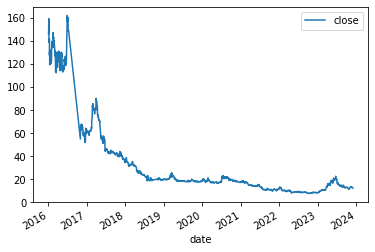

In [64]:
new_df.plot()

<AxesSubplot:xlabel='date'>

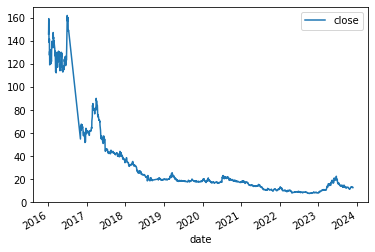

In [38]:
new_df.plot()

In [45]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge

end_time = '2023-10-26'
data_train = new_df[new_df.index < end_time].copy()
data_test = new_df[new_df.index >= end_time].copy()


sku_list = data_train.columns

# 创建空的字典，用于存储每个时间序列的预测模型
forecasters = {}
# 循环遍历每批次SKU，分别训练预测模型
for i in range(0, len(sku_list), 200):
    batch_skus = sku_list[i:i + 200]
    for sku in batch_skus:
        forecaster = ForecasterAutoreg(  
        regressor=Ridge(random_state=123),  
        lags=15,  
                )
        # 拟合模型
        forecaster.fit(y=data_train[sku])
        forecasters[sku] = forecaster
    # print(f"Finished training batch {i // self.batch_size + 1}/{len(sku_list) // self.batch_size + 1}")
# 进行未来预测
predictions = pd.DataFrame()
for sku, forecaster in forecasters.items():
    forecast = forecaster.predict(steps=10)
    predictions[sku] = forecast
predictions

/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:781: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:781: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:843: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


,close
15,11.205599
16,11.331316
17,11.429579
18,11.479935
19,11.566867
20,11.649918
21,11.726399
22,11.836427
23,11.891771
24,11.951417


In [ ]:
# bins = None  
# num_bins = 10  
  
# new_df['close_open_rate_cut'] = pd.cut(new_df['close_open_rate'],bins=num_bins)  
  
# new_df['close_open_rate_cut'].value_counts(normalize =True)

In [ ]:
# df.groupby(['year', 'is_up_preclose']).size().div(df.groupby(['year']).size(), level=0)

In [ ]:
# import datetime
# from datetime import timedelta  
# import yfinance as yf  


# def fetch_stock_data(ticker_list, years=5):
#     end_date = datetime.datetime.now()  
#     start_date = end_date - timedelta(days=years * 365)

#     close_data_df = pd.DataFrame()
#     high_data_df = pd.DataFrame()
#     low_data_df = pd.DataFrame()

#     for ticker in ticker_list:
#         stock = yf.Ticker(ticker)

#         hist_data = stock.history(period='1d', start=start_date, end=end_date)

#         close_data = hist_data['Close'].rename(ticker)
#         close_data_df = pd.merge(close_data_df, pd.DataFrame(close_data), left_index=True, right_index=True, how='outer')

#         high_data = hist_data['High'].rename(ticker)
#         high_data_df = pd.merge(high_data_df, pd.DataFrame(high_data), left_index=True, right_index=True, how='outer')

#         low_data = hist_data['Low'].rename(ticker)
#         low_data_df = pd.merge(low_data_df, pd.DataFrame(low_data), left_index=True, right_index=True, how='outer')

#     return close_data_df, high_data_df, low_data_df

# # Fetch the data
# ticker_list = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'META', 'TSLA', 'NVDA', 'ADBE', 'NFLX', 'INTC']
# years = 5

# close, high, low = fetch_stock_data(ticker_list, years)


# # def get_high_lows_lookback(high, low, lookback_days):
# #     lookback_high = high.shift(1).rolling(lookback_days).max()
# #     lookback_low = low.shift(1).rolling(lookback_days).min()

# #     return lookback_high, lookback_low

# # lookback_days = 50
# # lookback_high, lookback_low = get_high_lows_lookback(high, low, lookback_days)